In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

import keras_gpu_metrics

In [ ]:
(training_set, test_set), ds_info = tfds.load(
    'caltech_birds2011',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


# def normalize_img(image, label):
#     """Normalizes images: `uint8` -> `float32`."""
#     return tf.cast(image, tf.float32) / 255., label
#
#
# mnist_train = mnist_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE).cache()
# mnist_train = mnist_train.shuffle(ds_info.splits['train'].num_examples)
# mnist_train = mnist_train.batch(128)
# mnist_train = mnist_train.prefetch(tf.data.AUTOTUNE)
#
# mnist_test = mnist_test.map(
#     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# mnist_test = mnist_test.batch(128)
# mnist_test = mnist_test.cache()
# mnist_test = mnist_test.prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

In [ ]:
# Visualizes an example from the dataset
for input, output in training_set:
    break

#plt.imshow(input[0]);

In [ ]:
input.shape

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [4]:
metrics = [
    tf.keras.metrics.SparseCategoricalAccuracy(),
    keras_gpu_metrics.gpu_utilization_metric(0),  # Assuming we have only one GPU and we are training on GPU 0
    keras_gpu_metrics.gpu_clock_speed_metric(0),
    keras_gpu_metrics.gpu_temperature_metric(0),
    keras_gpu_metrics.gpu_memory_free_metric(0),
    keras_gpu_metrics.gpu_memory_used_metric(0),
    keras_gpu_metrics.gpu_fan_speed_metric(0),
    keras_gpu_metrics.gpu_power_usage_metric(0),
]

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=metrics
)

In [5]:
history = model.fit(
    mnist_train,
    epochs=5,
    validation_data=mnist_test,
)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.3612 - sparse_categorical_accuracy: 0.9003 - gpu_0_utilization: 7.0000 - gpu_0_clock_mhz: 255.0000 - gpu_0_temperature: 32.0000 - gpu_0_memory_free: 1880112384.0000 - gpu_0_memory_used: 23889704960.0000 - gpu_0_fan_speed: 0.0000e+00 - gpu_0_power_usage: 40284.0000 - val_loss: 0.1913 - val_sparse_categorical_accuracy: 0.9433 - val_gpu_0_utilization: 24.0000 - val_gpu_0_clock_mhz: 585.0000 - val_gpu_0_temperature: 31.0000 - val_gpu_0_memory_free: 1594902784.0000 - val_gpu_0_memory_used: 24174911488.0000 - val_gpu_0_fan_speed: 0.0000e+00 - val_gpu_0_power_usage: 39899.0000
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1616 - sparse_categorical_accuracy: 0.9535 - gpu_0_utilization: 7.0000 - gpu_0_clock_mhz: 255.0000 - gpu_0_temperature: 32.0000 - gpu_0_memory_free: 1880112384.0000 - gpu_0_memory_used: 23889704960.0000 - gpu_0_fan_speed: 0.0000e+00 - gpu_0_power_usage: 40284.0000 - val_lo

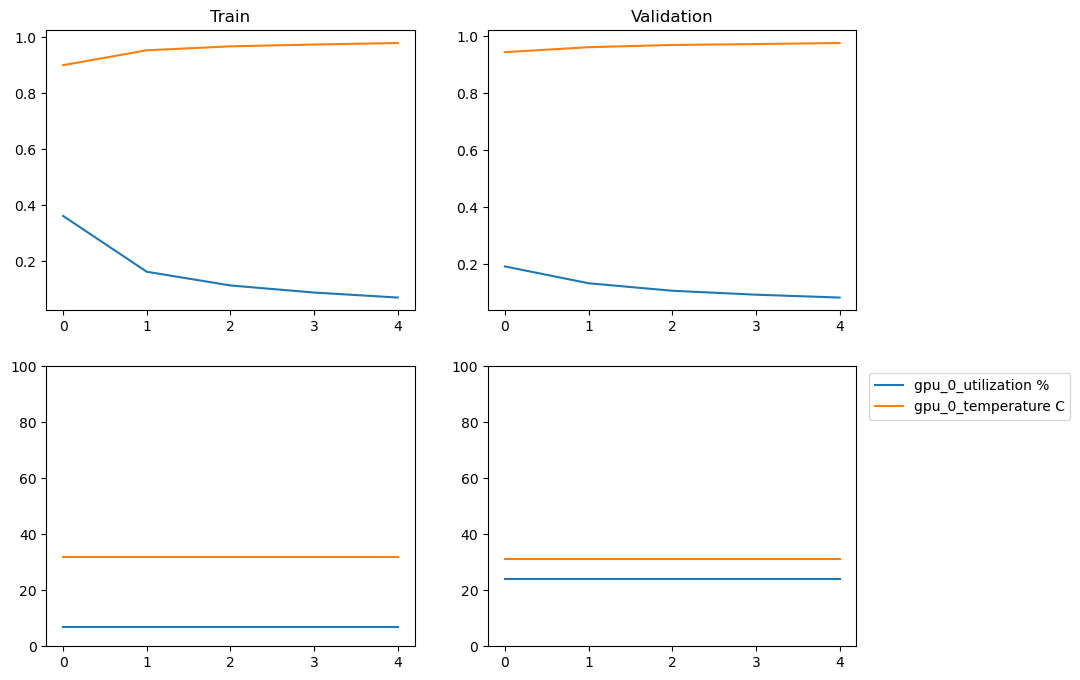

In [7]:
loss_history = history.history

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0][0].set_title('Train')
ax[0][1].set_title('Validation')

ax[0][0].plot(loss_history['loss'], label='loss')
ax[0][0].plot(loss_history['sparse_categorical_accuracy'], label='accuracy')
ax[0][1].plot(loss_history['val_loss'], label='loss')
ax[0][1].plot(loss_history['val_sparse_categorical_accuracy'], label='accuracy')

ax[1][0].plot(loss_history['gpu_0_utilization'], label='gpu_0_utilization %')
ax[1][1].plot(loss_history['val_gpu_0_utilization'], label='gpu_0_utilization %')
ax[1][0].plot(loss_history['gpu_0_temperature'], label='gpu_0_temperature C')
ax[1][1].plot(loss_history['val_gpu_0_temperature'], label='gpu_0_temperature C')
ax[1][0].set_ylim(0, 100)
ax[1][1].set_ylim(0, 100)

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.subplots_adjust(right=0.8)
plt.show();